# Data Visualization

### Readme

This data set includes information about individual bike sharing rides made in a bike-sharing system covering the greater San Francisco Bay area.

The distance traveled and the duration of the bike is used are positively correlated. The number of rides conducted by members are higher in the summer months thant then the winter months. Also, it can be seen that the overall trend from 2017 to 2018 is positive (a higher number of rides was conducted). The mean age is 1984 with a nearly normal distribution.

The top 50 start and end stations almost make 50% of all the rides. Also 46 out of the 50 start and end stations are within both - start and end destination. Moreover, these stations are mostly close to other public transport stations. This should be investigated further for the network planning of the company.


Loading Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import datetime
from datetime import date
import time

import os
import glob

from geopy.distance import geodesic

%matplotlib inline

Loading Datasets

In [4]:
dfcc = pd.read_pickle('cleaned_dataframe2.pkl')

Create a sample for the scatterplots

In [5]:
sample = dfcc.sample(1500)
sample.reset_index(inplace = True, drop = True)

Remove the distance equals 0 values for the scatterplots

In [6]:
sample_dis_nonzero = sample[sample.distance != 0]
sample_dis_nonzero.reset_index(drop = True, inplace = True)

<a id='expl'></a>
# Explanatory Analysis

__ Duration vs. Distance__

The distance and the duration of the bike rides are correlated with each other (Rides starting and ending at the same spot were excluded in that analysis)


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


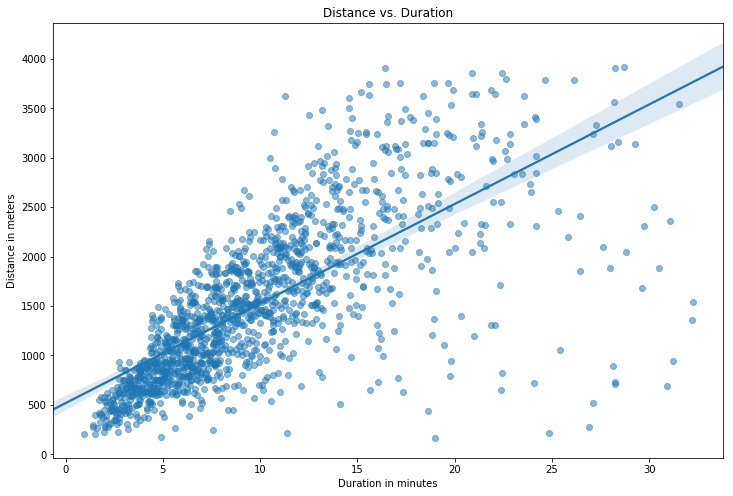

In [7]:
plt.figure(figsize = (12,8))

sb.regplot(data = sample_dis_nonzero, x = 'duration_minutes', y = 'distance', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/2})

plt.title('Distance vs. Duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Distance in meters');

print('The distance and the duration of the bike rides are correlated with each other (Rides starting and ending at the same spot were excluded in that analysis)')

<br>
__ Rides over time __

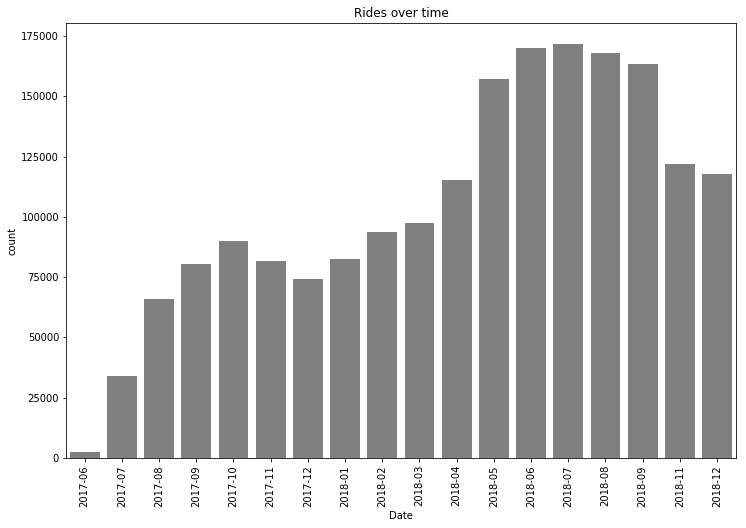

The rides over time are dependend on the time of the year. It is visible that in the summer months more rides are conduced. Also it can be seen that the rides in 2018 were way more than in 2017. The business model seems to work.


In [8]:
fig, ax = plt.subplots(figsize = (12,8))

# We need to draw the canvas, otherwise the labels won't be positioned and won't have values yet.
fig.canvas.draw()

# Plot
sb.countplot(data = dfcc, x = 'year_and_month', color = 'grey')

# The labels have to be adjusted
labels = [item.get_text() for item in ax.get_xticklabels()]

label_list = []
for i in labels:
    label_list.append(i[0:7])

labels = label_list

# Design
ax.set_xticklabels(labels)

plt.title('Rides over time')
plt.xticks(rotation=90)
plt.xlabel('Date')

plt.show();

print('The rides over time are dependend on the time of the year. It is visible that in the summer months more rides are conduced. Also it can be seen that the rides in 2018 were way more than in 2017. The business model seems to work.')

<br>
__ Age structure __

In [9]:
dfcc_age = dfcc[dfcc.member_birth_year > '1940']

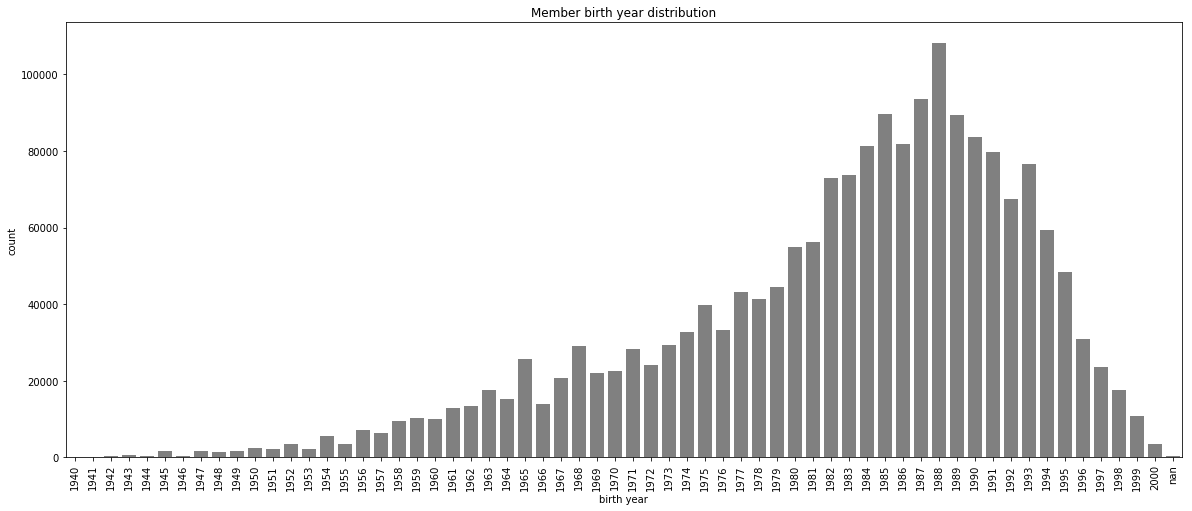

The mean birthyear of the users is 1982. The birthyear of the members is nearly normally distributed with a longer tail towards the older generation


In [10]:
fig, ax = plt.subplots(figsize = (20,8))

# We need to draw the canvas, otherwise the labels won't be positioned and won't have values yet.
fig.canvas.draw()

sb.countplot(data = dfcc_age, x = 'member_birth_year', color = 'grey')

# The labels have to be adjusted
labels = [item.get_text() for item in ax.get_xticklabels()]

label_list = []
for i in labels:
    label_list.append(i[0:4])

labels = label_list

# Design
ax.set_xticklabels(labels)

plt.title('Member birth year distribution')
plt.xticks(rotation=90)
plt.xlabel('birth year');

plt.show();

print('The mean birthyear of the users is {}. The birthyear of the members is nearly normally distributed with a longer tail towards the older generation'.format(round(dfcc_age.member_birth_year.astype(float).mean())))

<br>
__ Most frequently used stations __

The top 50 start stations make 49.5% of all the started rides
The top 50 end stations make 51.6% of all the ended rides

45 out of the top 50 start and end stations are in the top 50 of the start and end stations

This shows that the top 50 start and end stations are extremely import for the company. The connection between them should be investigated further to plan additional stations with such a high demand.


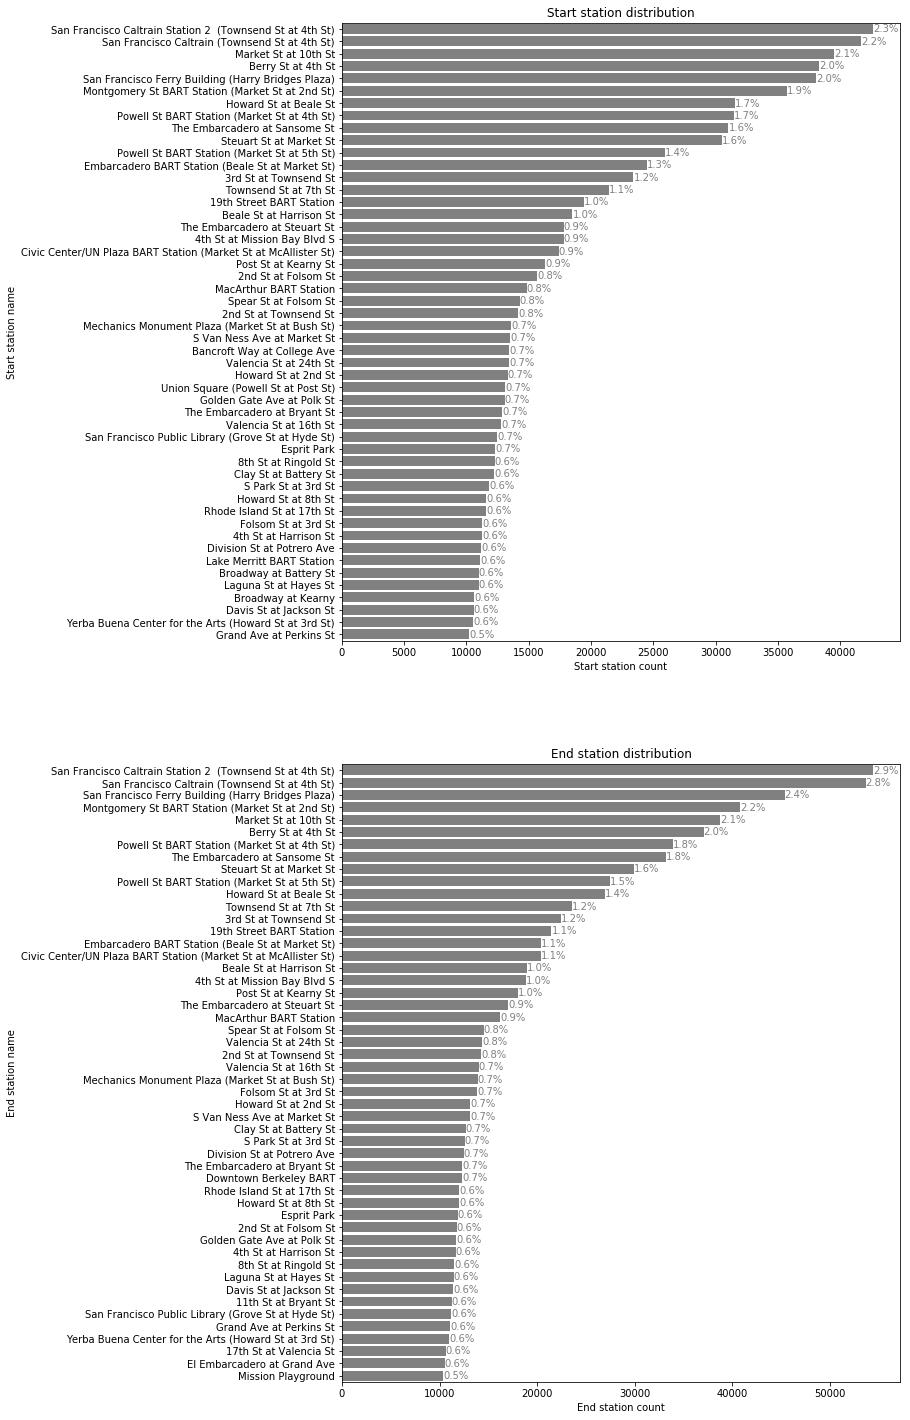

In [11]:
# create the plot

plt.figure(figsize = [10, 25])


# Start Station
plt.subplot(2, 1, 1)
sb.countplot(data = dfcc, y = 'start_station_name', color = 'grey', order = dfcc.start_station_name.value_counts().iloc[:50].index)

plt.title('Start station distribution')
plt.xlabel('Start station count')
plt.ylabel('Start station name')


# add annotations
n_points = dfcc.shape[0]
cat_counts = dfcc['start_station_name'].value_counts().iloc[:50]
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+5, loc, pct_string, va = 'center', color = 'grey')




# End Station
plt.subplot(2, 1, 2)
sb.countplot(data = dfcc, y = 'end_station_name', color = 'grey', order = dfcc.end_station_name.value_counts().iloc[:50].index)

plt.title('End station distribution')
plt.xlabel('End station count')
plt.ylabel('End station name')


# add annotations
n_points = dfcc.shape[0]
cat_counts = dfcc['end_station_name'].value_counts().iloc[:50]
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+5, loc, pct_string, va = 'center', color = 'grey');

    
print('The top 50 start stations make {}% of all the started rides'.format(round(dfcc.start_station_name.value_counts().head(50).sum() / dfcc.start_station_name.value_counts().sum() * 100, 1)))
print('The top 50 end stations make {}% of all the ended rides'.format(round(dfcc.end_station_name.value_counts().head(50).sum() / dfcc.end_station_name.value_counts().sum() * 100, 1)))
print('')

start_stations_top50 = dfcc.start_station_name.value_counts().head(50).index
end_stations_top50 = dfcc.end_station_name.value_counts().head(50).index

station_list = []
for i in start_stations_top50:
    if i not in end_stations_top50:
        station_list.append(i)

print('{} out of the top 50 start and end stations are in the top 50 of the start and end stations'.format(50 - len(station_list)))
print ('')
print('This shows that the top 50 start and end stations are extremely import for the company. The connection between them should be investigated further to plan additional stations with such a high demand.')